In [2]:
# Classic Imports
import pandas as pd
import re
import copy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Getting all the Datasets
before = pd.read_csv('CSV\BeforeRedData.csv')
after = pd.read_csv('CSV\AfterRedData.csv')

In [4]:
def rangeTwo(x, y):
    Final = []
    while x < y:
        Final.append(x)
        x = x + 1
    return Final

def createList(dataset):
    reform_list = []
    for reform in dataset.index:
        place_holder_list = [0, 0, 0]
        for holder in rangeTwo(0, (len(dataset.columns) - 1)):
            column_name = 'M' + str(holder)
            holder_in = dataset.loc[reform, column_name]
            if holder_in == 1:
                place_holder_list[0] = place_holder_list[0] + 1
            elif holder_in == 3:
                place_holder_list[2] = place_holder_list[2] + 1
            elif holder_in == 4:
                place_holder_list[0] = place_holder_list[0] + 1
            elif holder_in == -1:
                place_holder_list[1] = place_holder_list[1] + 1
            elif holder_in == -4:
                place_holder_list[1] = place_holder_list[1] + 1
        reform_list.append(place_holder_list)
        
    return reform_list

test_input = createList(before)
test_output = createList(after)

In [5]:
before_test = pd.DataFrame(test_input, columns=['Goal_Home', 'Goal_Away', 'Red_Card'])
after_test = pd.DataFrame(test_output, columns=['Goal_Home', 'Goal_Away', 'Red_Card'])

In [6]:
# Adding score rate and red card time
total_score_rate_list = []
time_red_card = []
for score_rate_total_list in before.index:
    total_goal_home = 0
    total_goal_away = 0
    red_card_position = 0
    for score_rate in rangeTwo(0, len(before.columns) - 1):
        score_rate_column = 'M' + str(score_rate)
        total_check = before.loc[score_rate_total_list, score_rate_column]
        if total_check == 1:
            total_goal_home = total_goal_home + 1
        elif total_check == -1:
            total_goal_away = total_goal_away + 1
        elif total_check == 3 or total_check == -3:
            red_card_position = score_rate
    if red_card_position > 0:
        score_rate_list_place_holder = []
        score_rate_goal_home = total_goal_home / red_card_position 
        score_rate_goal_away = total_goal_away / red_card_position
        score_rate_list_place_holder.append(score_rate_goal_home)
        score_rate_list_place_holder.append(score_rate_goal_away)
        total_score_rate_list.append(score_rate_list_place_holder)
        # if red_card_position <= 15:
        #     time_red_card.append(1)
        # elif red_card_position > 15 and red_card_position <= 30:
        #     time_red_card.append(2)
        # elif red_card_position > 30 and red_card_position <= 45:
        #     time_red_card.append(3)
        # elif red_card_position > 45 and red_card_position <= 60:
        #     time_red_card.append(4)
        # elif red_card_position > 60 and red_card_position <= 75:
        #     time_red_card.append(5)
        # elif red_card_position > 75:
        #     time_red_card.append(6)
        time_red_card.append(red_card_position)
    if red_card_position == 0:
        score_rate_list_place_holder = []
        score_rate_goal_home = total_goal_home / 1
        score_rate_goal_away = total_goal_away / 1
        score_rate_list_place_holder.append(score_rate_goal_home)
        score_rate_list_place_holder.append(score_rate_goal_away)
        total_score_rate_list.append(score_rate_list_place_holder)
        # if red_card_position <= 15:
        #     time_red_card.append(1)
        # elif red_card_position > 15 and red_card_position <= 30:
        #     time_red_card.append(2)
        # elif red_card_position > 30 and red_card_position <= 45:
        #     time_red_card.append(3)
        # elif red_card_position > 45 and red_card_position <= 60:
        #     time_red_card.append(4)
        # elif red_card_position > 60 and red_card_position <= 75:
        #     time_red_card.append(5)
        # elif red_card_position > 75:
        #     time_red_card.append(6)
        time_red_card.append(red_card_position)

In [7]:
score_rate_home = []
score_rate_away  = []
for actual_score_rate in total_score_rate_list:
    if actual_score_rate[0] <= 0.01:
        score_rate_home.append(1)
    elif actual_score_rate[0] > 0.01 and actual_score_rate[0] <= 0.02:
        score_rate_home.append(2)
    elif actual_score_rate[0] > 0.02 and actual_score_rate[0] <= 0.03:
        score_rate_home.append(3)
    elif actual_score_rate[0] > 0.03 and actual_score_rate[0] <= 0.04:
        score_rate_home.append(4)
    elif actual_score_rate[0] > 0.04 and actual_score_rate[0] < 0.05:
        score_rate_home.append(5)
    elif actual_score_rate[0] >= 0.05:
        score_rate_home.append(6)
        
    if actual_score_rate[1] <= 0.01:
        score_rate_away.append(1)
    elif actual_score_rate[1] > 0.01 and actual_score_rate[1] <= 0.02:
        score_rate_away.append(2)
    elif actual_score_rate[1] > 0.02 and actual_score_rate[1] <= 0.03:
        score_rate_away.append(3)
    elif actual_score_rate[1] > 0.03 and actual_score_rate[1] <= 0.04:
        score_rate_away.append(4)
    elif actual_score_rate[1] > 0.04 and actual_score_rate[1] < 0.05:
        score_rate_away.append(5)
    elif actual_score_rate[1] >= 0.05:
        score_rate_away.append(6)

before_test.insert(3, "Score_Rate_Home", score_rate_home, True)
before_test.insert(4, "Score_Rate_Away", score_rate_away, True)
# before_test.insert(5, "Red_Time", time_red_card, True)

In [8]:
Score_lead_list = []
for score_lead_test in before_test.index:
    if before_test.loc[score_lead_test, 'Goal_Home'] > before_test.loc[score_lead_test, 'Goal_Away']:
        Score_lead_list.append('Home')
    elif before_test.loc[score_lead_test, 'Goal_Home'] < before_test.loc[score_lead_test, 'Goal_Away']:
        Score_lead_list.append('Away')
    elif before_test.loc[score_lead_test, 'Goal_Home'] == before_test.loc[score_lead_test, 'Goal_Away']:
        Score_lead_list.append('Equal')
        
before_test.insert(1, "Lead", Score_lead_list, True)

In [9]:
for red_card_before_count in before_test.index:
    if before_test.loc[red_card_before_count, 'Red_Card'] == 1:
        before_test.loc[red_card_before_count, 'Red_Card'] = 'Home'
    elif before_test.loc[red_card_before_count, 'Red_Card'] == 0:
        before_test.loc[red_card_before_count, 'Red_Card'] = 'Away'

In [10]:
after_test_plus = after_test.copy()
range_test = ['Goal_Home', 'Goal_Away']
for equal in after_test_plus.index:
    for equal_test in range_test:
        after_test_plus.loc[equal, equal_test] = after_test_plus.loc[equal, equal_test] + before_test.loc[equal, equal_test]

In [11]:
After_win_team = []
for win_team_count in after_test_plus.index:
    if after_test_plus.loc[win_team_count, 'Goal_Home'] > after_test_plus.loc[win_team_count, 'Goal_Away']:
        After_win_team.append('Home')
    elif after_test_plus.loc[win_team_count, 'Goal_Home'] < after_test_plus.loc[win_team_count, 'Goal_Away']:
        After_win_team.append('Away')
    elif after_test_plus.loc[win_team_count, 'Goal_Home'] == after_test_plus.loc[win_team_count, 'Goal_Away']:
        After_win_team.append('Equal')
        
after_test_plus.insert(2, "Status", After_win_team, True)

In [12]:
for red_card_after_count in after_test_plus.index:
    if after_test_plus.loc[red_card_after_count, 'Red_Card'] == 1:
        after_test_plus.loc[red_card_after_count, 'Red_Card'] = 'Home'
    elif after_test_plus.loc[red_card_after_count, 'Red_Card'] == 0:
        after_test_plus.loc[red_card_after_count, 'Red_Card'] = 'Away'

In [13]:
before_test = before_test.drop(['Goal_Home', 'Goal_Away'], axis=1)
after_test_plus = after_test_plus.drop(['Goal_Home', 'Goal_Away'], axis=1)

In [14]:
before_test

,Lead,Red_Card,Score_Rate_Home,Score_Rate_Away
0,Home,Home,4,2
1,Equal,Away,1,1
2,Home,Away,6,1
3,Equal,Away,3,3
4,Away,Away,1,2
...,...,...,...,...
3561,Away,Away,1,5
3562,Home,Away,6,2
3563,Home,Away,6,1
3564,Equal,Away,1,1


In [15]:
after_test_plus

,Status,Red_Card
0,Away,Home
1,Away,Away
2,Home,Away
3,Home,Away
4,Equal,Away
...,...,...
3561,Home,Away
3562,Home,Away
3563,Home,Away
3564,Home,Away


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_encoded = before_test[before_test.columns[:]].apply(le.fit_transform)
y_encoded = after_test_plus[after_test_plus.columns[:]].apply(le.fit_transform)

In [17]:
# x = before_test.iloc[:, range(0, 4)].values
# y = after_test_plus.iloc[:, 0].values

x = x_encoded.iloc[:, range(0, 4)].values
y = y_encoded.iloc[:, 0].values

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 30)

In [19]:
from sklearn.svm import SVC

classifier_svm = SVC(kernel = 'rbf', random_state = 0)
classifier_svm.fit(x_train, y_train)

SVC(random_state=0)

In [20]:
y_pred_svm = classifier_svm.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)
print(classification_report(y_test, y_pred_svm))

[[225  55  22]
 [ 34 134 111]
 [ 13  42 434]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.78       302
           1       0.58      0.48      0.53       279
           2       0.77      0.89      0.82       489

    accuracy                           0.74      1070
   macro avg       0.72      0.70      0.71      1070
weighted avg       0.73      0.74      0.73      1070



In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=80)
classifier_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=80)

In [23]:
y_pred_knn = classifier_knn.predict(x_test)

In [24]:
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[224  55  23]
 [ 36 129 114]
 [ 12  39 438]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       302
           1       0.58      0.46      0.51       279
           2       0.76      0.90      0.82       489

    accuracy                           0.74      1070
   macro avg       0.72      0.70      0.71      1070
weighted avg       0.73      0.74      0.73      1070



In [25]:
error = []
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

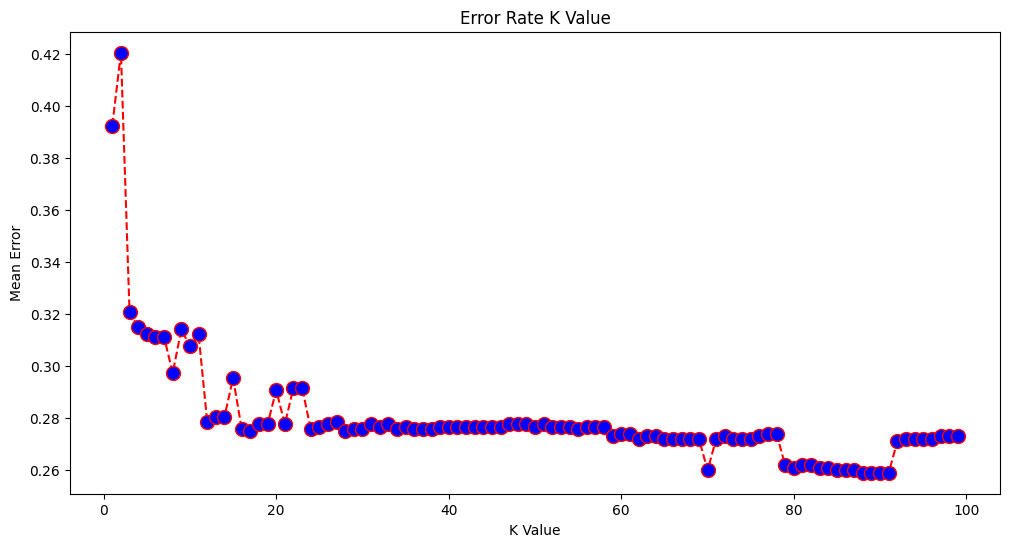

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
y_pred_randomForest = rf.predict(x_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred_randomForest)
print(classification_report(y_test, y_pred_randomForest))
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       302
           1       0.65      0.27      0.38       279
           2       0.75      0.90      0.82       489

    accuracy                           0.72      1070
   macro avg       0.70      0.67      0.65      1070
weighted avg       0.71      0.72      0.69      1070

Accuracy: 0.7224299065420561


In [30]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
logistic.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [31]:
y_pred_logistic = logistic.predict(x_test)

In [32]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       302
           1       0.52      0.19      0.27       279
           2       0.72      0.94      0.82       489

    accuracy                           0.70      1070
   macro avg       0.66      0.64      0.62      1070
weighted avg       0.67      0.70      0.66      1070



In [33]:
from xgboost import XGBClassifier
learn = XGBClassifier()
learn.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [34]:
y_pred_XG = learn.predict(x_test)
cm = confusion_matrix(y_test, y_pred_XG)
print(cm)
print(classification_report(y_test, y_pred_XG))

[[263  17  22]
 [ 86  74 119]
 [ 24  23 442]]
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       302
           1       0.65      0.27      0.38       279
           2       0.76      0.90      0.82       489

    accuracy                           0.73      1070
   macro avg       0.70      0.68      0.66      1070
weighted avg       0.71      0.73      0.69      1070



In [96]:
from sklearn import metrics
import torch

fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, y_pred_svm, pos_label=2)
fpr2, tpr2, thresh2 = metrics.roc_curve(y_test, y_pred_knn, pos_label=2)
fpr3, tpr3, thresh3 = metrics.roc_curve(y_test, y_pred_randomForest, pos_label=2)
fpr4, tpr4, thresh4 = metrics.roc_curve(y_test, y_pred_logistic, pos_label=2)
fpr5, tpr5, thresh5 = metrics.roc_curve(y_test, y_pred_XG, pos_label=2)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = metrics.roc_curve(y_test, random_probs, pos_label=2)

# squeezer = torch.tensor([y_pred_svm],dtype=torch.float)
# inputted = torch.softmax(squeezer, dim=1)

# print(len(inputted[0]))
# print(len(y_test))

# y_pred_svm = np.transpose([pred[:, 0] for pred in y_pred_svm])

# auc_score = metrics.roc_auc_score(y_test,  y_pred_svm, average=None)

# print(auc_score)

C:\Users\micha\AppData\Local\Temp\ipykernel_2564\2744496275.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


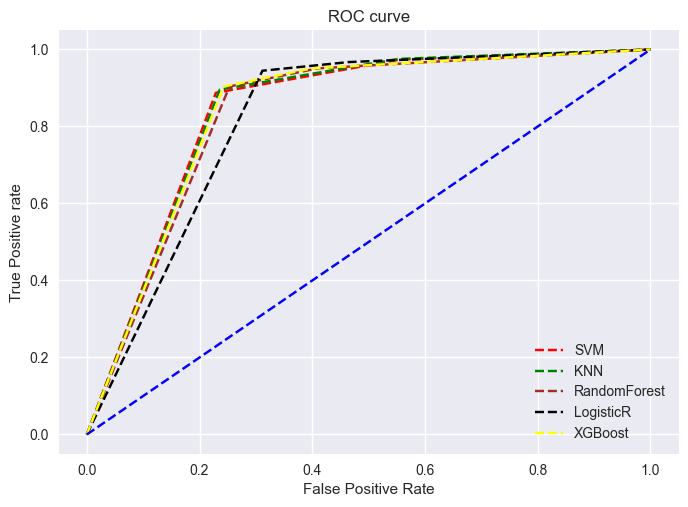

In [98]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='SVM')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='brown', label='RandomForest')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='LogisticR')
plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='XGBoost')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [139]:
incMinute = pd.read_csv('CSV\MinuteByMinute.csv')
baseINC = pd.read_csv('CSV\RawINCData.csv')

In [140]:
incMinute

,Unnamed: 0,ID,M0,M1,M2,M3,M4,M5,M6,M7,...,M81,M82,M83,M84,M85,M86,M87,M88,M89,M90
0,28,28,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,Yellow_Home,-,-
1,29,29,-,-,-,-,-,-,-,-,...,-,-,Yellow_Home,-,-,-,Goal_Home,Yellow_Home,-,-
2,30,30,-,-,-,-,Goal_Away,-,-,-,...,-,-,-,-,-,-,Yellow_Away,-,-,"Yellow_Away,Yellow_Home"
3,31,31,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,Yellow_Away
4,32,32,-,-,Goal_Home,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,"Yellow_Away,Red_Card_Home"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34737,52965,52965,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,Yellow_Away,-,-
34738,52968,52968,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
34739,52969,52969,-,-,-,-,Goal_Away,-,Yellow_Away,-,...,-,-,-,-,-,-,-,-,-,-
34740,52971,52971,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [141]:
drop_red_list = []

count_red_home = 0
for red_card_home in baseINC['Red_Card_Home']:
    if red_card_home > 0:
        drop_red_list.append(count_red_home)
    count_red_home = count_red_home + 1
    
count_red_away = 0
for red_card_away in baseINC['Red_Card_Away']:
    if red_card_away > 0 and count_red_away not in drop_red_list:
        drop_red_list.append(count_red_away)
    count_red_away = count_red_away + 1

incMinute = incMinute.drop(drop_red_list)

In [142]:
incMinute

,Unnamed: 0,ID,M0,M1,M2,M3,M4,M5,M6,M7,...,M81,M82,M83,M84,M85,M86,M87,M88,M89,M90
0,28,28,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,Yellow_Home,-,-
1,29,29,-,-,-,-,-,-,-,-,...,-,-,Yellow_Home,-,-,-,Goal_Home,Yellow_Home,-,-
2,30,30,-,-,-,-,Goal_Away,-,-,-,...,-,-,-,-,-,-,Yellow_Away,-,-,"Yellow_Away,Yellow_Home"
3,31,31,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,Yellow_Away
5,33,33,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34737,52965,52965,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,Yellow_Away,-,-
34738,52968,52968,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
34739,52969,52969,-,-,-,-,Goal_Away,-,Yellow_Away,-,...,-,-,-,-,-,-,-,-,-,-
34740,52971,52971,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [143]:
incMinute = incMinute.drop(['Unnamed: 0', 'ID'], axis=1)

In [144]:
primary_double_list = []
for check_double in incMinute.index:
    checker_for_double = False
    for double_count in incMinute.loc[check_double]:
        double_count_list = double_count.split(',')
        if len(double_count_list) > 1:
            checker_for_double = True
    if checker_for_double == True:
        primary_double_list.append(check_double)

incMinute = incMinute.drop(primary_double_list)

In [145]:
incMinute

,M0,M1,M2,M3,M4,M5,M6,M7,M8,M9,...,M81,M82,M83,M84,M85,M86,M87,M88,M89,M90
1,-,-,-,-,-,-,-,-,-,-,...,-,-,Yellow_Home,-,-,-,Goal_Home,Yellow_Home,-,-
3,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,Yellow_Away
5,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
6,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,Goal_Home
8,-,-,-,-,-,-,Goal_Away,-,-,-,...,-,-,-,-,-,-,-,Yellow_Away,-,Yellow_Away
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34737,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,Yellow_Away,-,-
34738,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
34739,-,-,-,-,Goal_Away,-,Yellow_Away,-,-,-,...,-,-,-,-,-,-,-,-,-,-
34740,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [146]:
for transform_after in incMinute.index:
    for transform_column_after in rangeTwo(0, len(incMinute.columns)):
        name_column_after = 'M' + str(transform_column_after)
        if incMinute.loc[transform_after, name_column_after] == '-':
            incMinute.loc[transform_after, name_column_after] = 0
        elif incMinute.loc[transform_after, name_column_after] == 'Goal_Home':
            incMinute.loc[transform_after, name_column_after] = 1
        elif incMinute.loc[transform_after, name_column_after] == 'Yellow_Home':
            incMinute.loc[transform_after, name_column_after] = 2
        elif incMinute.loc[transform_after, name_column_after] == 'Red_Card_Home':
            incMinute.loc[transform_after, name_column_after] = 3
        elif incMinute.loc[transform_after, name_column_after] == 'Own_Home':
            incMinute.loc[transform_after, name_column_after] = 4
        elif incMinute.loc[transform_after, name_column_after] == 'Goal_Away':
            incMinute.loc[transform_after, name_column_after] = -1
        elif incMinute.loc[transform_after, name_column_after] == 'Yellow_Away':
            incMinute.loc[transform_after, name_column_after] = -2
        elif incMinute.loc[transform_after, name_column_after] == 'Red_Card_Away':
            incMinute.loc[transform_after, name_column_after] = -3
        elif incMinute.loc[transform_after, name_column_after] == 'Own_Away':
            incMinute.loc[transform_after, name_column_after] = -4

incMinute

,M0,M1,M2,M3,M4,M5,M6,M7,M8,M9,...,M81,M82,M83,M84,M85,M86,M87,M88,M89,M90
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,2,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-2
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,-2,0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-2,0,0
34738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34739,0,0,0,0,-1,0,-2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
from sklearn.preprocessing import LabelEncoder

def minuteWin(minute, red_card_data_selection, dataset, machineLearning):
    # First Part
    goal_home_total_list = []
    goal_away_total_list =  []
    total_score_rate_list_3 = []
    for score_rate_total_list_3 in dataset.index:
        total_goal_home_3 = 0
        total_goal_away_3 = 0
        red_card_position_3 = 0
        for score_rate_3 in rangeTwo(0, (minute + 1)):
            score_rate_column_3 = 'M' + str(score_rate_3)
            total_check_3 = dataset.loc[score_rate_total_list_3, score_rate_column_3]
            if total_check_3 == 1:
                total_goal_home_3 = total_goal_home_3 + 1
            elif total_check_3 == -1:
                total_goal_away_3 = total_goal_away_3 + 1
            elif total_check_3 == 4:
                total_goal_home_3 = total_goal_home_3 + 1
            elif total_check_3 == -4:
                total_goal_away_3 = total_goal_away_3 + 1
            
            red_card_position_3 = minute
    
        goal_home_total_list.append(total_goal_home_3)
        goal_away_total_list.append(total_goal_away_3)
        
        score_rate_list_place_holder_2 = []
        score_rate_goal_home_2 = total_goal_home_3 / red_card_position_3 
        score_rate_goal_away_2 = total_goal_away_3 / red_card_position_3
        score_rate_list_place_holder_2.append(score_rate_goal_home_2)
        score_rate_list_place_holder_2.append(score_rate_goal_away_2)
        total_score_rate_list_3.append(score_rate_list_place_holder_2)

    # Second Part
    database_test = []
    for test_red_data_count in rangeTwo(0, len(goal_home_total_list)):
        red_card_data_selection_true = 0
        if red_card_data_selection == 'Home':
            red_card_data_selection_true = 1
        elif red_card_data_selection == 'Away':
            red_card_data_selection_true = 0
        score_rate_placeholder_list = [goal_home_total_list[test_red_data_count], goal_away_total_list[test_red_data_count], red_card_data_selection_true]
        for score_rated_place_holder in total_score_rate_list_3[test_red_data_count]:    
            if score_rated_place_holder <= 0.01:
                score_rate_placeholder_list.append(1)
            elif score_rated_place_holder > 0.01 and score_rated_place_holder <= 0.02:
                score_rate_placeholder_list.append(2)
            elif score_rated_place_holder > 0.02 and score_rated_place_holder <= 0.03:
                score_rate_placeholder_list.append(3)
            elif score_rated_place_holder > 0.03 and score_rated_place_holder <= 0.04:
                score_rate_placeholder_list.append(4)
            elif score_rated_place_holder > 0.04 and score_rated_place_holder < 0.05:
                score_rate_placeholder_list.append(5)
            elif score_rated_place_holder >= 0.05:
                score_rate_placeholder_list.append(6)
        total_score_rate_list_3[test_red_data_count][0]
        
        database_test.append(score_rate_placeholder_list)
    
    test_minute_before = pd.DataFrame(database_test, columns=['Goal_Home', 'Goal_Away', 'Red_Card', 'Score_Rate_Home', 'Score_Rate_Away'])
    
    # Lead column
    lead_list = []
    for lead_test in test_minute_before.index:
        if test_minute_before.loc[lead_test, 'Goal_Home'] > test_minute_before.loc[lead_test, 'Goal_Away']:
            lead_list.append('Home')
        elif test_minute_before.loc[lead_test, 'Goal_Home'] < test_minute_before.loc[lead_test, 'Goal_Away']:
            lead_list.append('Away')
        elif test_minute_before.loc[lead_test, 'Goal_Home'] == test_minute_before.loc[lead_test, 'Goal_Away']:
            lead_list.append('Equal')
    test_minute_before.insert(1, "Lead", lead_list, True)

    # Changing Red Card Data
    for red_card_count_before in test_minute_before.index:
        if test_minute_before.loc[red_card_count_before, 'Red_Card'] == 1:
            test_minute_before.loc[red_card_count_before, 'Red_Card'] = 'Home'
        elif test_minute_before.loc[red_card_count_before, 'Red_Card'] == 0:
            test_minute_before.loc[red_card_count_before, 'Red_Card'] = 'Away'

    # Third Part
    goal_home_total_after_list = []
    goal_away_total_after_list =  []
    for score_rate_total_list_3_after in dataset.index:
        total_goal_home_3_after = 0
        total_goal_away_3_after = 0
        for score_rate_3_after in rangeTwo(minute, 90):
            score_rate_column_3_after = 'M' + str(score_rate_3_after)
            total_check_3_after = dataset.loc[score_rate_total_list_3_after, score_rate_column_3_after]
            if total_check_3_after == 1:
                total_goal_home_3_after = total_goal_home_3_after + 1
            elif total_check_3_after == -1:
                total_goal_away_3_after = total_goal_away_3_after + 1
            elif total_check_3_after == 4:
                total_goal_home_3_after = total_goal_home_3_after + 1
            elif total_check_3_after == -4:
                total_goal_away_3_after = total_goal_away_3_after + 1
        goal_home_total_after_list.append(total_goal_home_3_after)
        goal_away_total_after_list.append(total_goal_away_3_after)

    # Adding Goals
    dataset_after_list = []
    for total_after_count in rangeTwo(0, len(goal_home_total_after_list)):
        place_holder_after_list = [goal_home_total_after_list[total_after_count], goal_away_total_after_list[total_after_count]]
        dataset_after_list.append(place_holder_after_list)
    
    test_minute_after_list = pd.DataFrame(dataset_after_list, columns=['Goal_Home', 'Goal_Away'])

    # After status
    After_win_team_list = []
    for after_win_team_count in test_minute_after_list.index:
        if test_minute_after_list.loc[after_win_team_count, 'Goal_Home'] > test_minute_after_list.loc[after_win_team_count, 'Goal_Away']:
            After_win_team_list.append('Home')
        elif test_minute_after_list.loc[after_win_team_count, 'Goal_Home'] < test_minute_after_list.loc[after_win_team_count, 'Goal_Away']:
            After_win_team_list.append('Away')
        elif test_minute_after_list.loc[after_win_team_count, 'Goal_Home'] == test_minute_after_list.loc[after_win_team_count, 'Goal_Away']:
            After_win_team_list.append('Equal')
            
    test_minute_after_list.insert(2, "Status_Original", After_win_team_list, True)
    
    # Dropping
    test_minute_before = test_minute_before.drop(['Goal_Home', 'Goal_Away'], axis=1)
    test_minute_after_list = test_minute_after_list.drop(['Goal_Home', 'Goal_Away'], axis=1)

    # Encoding
    le = LabelEncoder()
    test_minute_before_encoded = test_minute_before[test_minute_before.columns[:]].apply(le.fit_transform)

    # Fix
    for count_minute_red_card in test_minute_before_encoded.index:
        if red_card_data_selection == 'Home':
            test_minute_before_encoded.loc[count_minute_red_card, 'Red_Card'] = 1 
    
    # Forth Part
    x_test_minute = test_minute_before_encoded.iloc[:, range(0, 4)].values
    y_test_minute = machineLearning.predict(x_test_minute)

    # Inverse Transform
    # 0 = Away
    # 1 = Equal
    # 2 = Home
    y_test_minute_decoded = []
    for range_count_inverse in rangeTwo(0, len(y_test_minute)):
        if y_test_minute[range_count_inverse] == 0:
            y_test_minute_decoded.append('Away')
        elif y_test_minute[range_count_inverse] == 1:
            y_test_minute_decoded.append('Equal')
        elif y_test_minute[range_count_inverse] == 2:
            y_test_minute_decoded.append('Home')

    # PD Dataframe
    test_minute_y_decoded = pd.DataFrame(y_test_minute_decoded, columns=['Status_Predicted'])
    
    # Finally Done
    return test_minute_y_decoded, test_minute_after_list, test_minute_before_encoded

In [187]:
def winning_team(machineLearning, dataset, redCardTeam):
    final_list_theoratical = []
    for minute in rangeTwo(1, 91):
        minute_45_predicted, minute_45_original, original_dataset = minuteWin(minute, redCardTeam, dataset, machineLearning)
        minute_45_merged = pd.merge(minute_45_original, minute_45_predicted, left_index=True, right_index=True)
        theoretical_list = [0, 0, 0, 0, 0, 0, 0, 0, 0]
        for merge_final_count in minute_45_merged.index:
            if minute_45_merged.loc[merge_final_count, 'Status_Original'] == 'Away' and minute_45_merged.loc[merge_final_count, 'Status_Predicted'] == 'Away':
                theoretical_list[0] = theoretical_list[0] + 1
            elif minute_45_merged.loc[merge_final_count, 'Status_Original'] == 'Away' and minute_45_merged.loc[merge_final_count, 'Status_Predicted'] == 'Equal':
                theoretical_list[1] = theoretical_list[1] + 1
            elif minute_45_merged.loc[merge_final_count, 'Status_Original'] == 'Away' and minute_45_merged.loc[merge_final_count, 'Status_Predicted'] == 'Home':
                theoretical_list[2] = theoretical_list[2] + 1
            elif minute_45_merged.loc[merge_final_count, 'Status_Original'] == 'Equal' and minute_45_merged.loc[merge_final_count, 'Status_Predicted'] == 'Away':
                theoretical_list[3] = theoretical_list[3] + 1
            elif minute_45_merged.loc[merge_final_count, 'Status_Original'] == 'Equal' and minute_45_merged.loc[merge_final_count, 'Status_Predicted'] == 'Equal':
                theoretical_list[4] = theoretical_list[4] + 1
            elif minute_45_merged.loc[merge_final_count, 'Status_Original'] == 'Equal' and minute_45_merged.loc[merge_final_count, 'Status_Predicted'] == 'Home':
                theoretical_list[5] = theoretical_list[5] + 1
            elif minute_45_merged.loc[merge_final_count, 'Status_Original'] == 'Home' and minute_45_merged.loc[merge_final_count, 'Status_Predicted'] == 'Away':
                theoretical_list[6] = theoretical_list[6] + 1
            elif minute_45_merged.loc[merge_final_count, 'Status_Original'] == 'Home' and minute_45_merged.loc[merge_final_count, 'Status_Predicted'] == 'Equal':
                theoretical_list[7] = theoretical_list[7] + 1
            elif minute_45_merged.loc[merge_final_count, 'Status_Original'] == 'Home' and minute_45_merged.loc[merge_final_count, 'Status_Predicted'] == 'Home':
                theoretical_list[8] = theoretical_list[8] + 1
        
        final_list_theoratical.append(theoretical_list)
        
    return final_list_theoratical

In [193]:
final_check = winning_team(knn, incMinute, 'Away')

In [194]:
print(final_check)

[[55, 0, 6771, 18, 0, 6662, 25, 0, 11033], [159, 2, 6666, 73, 0, 6637, 83, 2, 10942], [209, 3, 6607, 125, 2, 6600, 187, 4, 10827], [272, 11, 6564, 168, 2, 6539, 268, 9, 10731], [355, 14, 6482, 205, 8, 6511, 356, 15, 10618], [425, 22, 6412, 256, 12, 6471, 432, 25, 10509], [502, 34, 6346, 286, 19, 6444, 493, 43, 10397], [547, 41, 6282, 361, 33, 6408, 565, 53, 10274], [631, 52, 6191, 387, 43, 6393, 641, 66, 10160], [689, 59, 6124, 444, 59, 6353, 711, 75, 10050], [740, 68, 6061, 487, 74, 6336, 779, 93, 9926], [788, 77, 6001, 542, 94, 6308, 841, 124, 9789], [852, 88, 5918, 581, 94, 6309, 911, 144, 9667], [890, 112, 5857, 621, 117, 6273, 972, 166, 9556], [956, 123, 5784, 664, 133, 6237, 1045, 186, 9436], [1007, 142, 5691, 712, 149, 6214, 1121, 205, 9323], [1060, 158, 5609, 776, 163, 6185, 1167, 234, 9212], [1111, 178, 5532, 799, 181, 6185, 1220, 255, 9103], [1158, 191, 5445, 872, 204, 6162, 1244, 284, 9004], [1207, 205, 5354, 923, 233, 6170, 1287, 312, 8873], [1241, 210, 5296, 971, 248, 6174

In [195]:
final_check_dataFrame = pd.DataFrame(final_check, columns=['Away-Away', 'Away-Equal', 'Away-Home', 'Equal-Away', 'Equal-Equal', 'Equal-Home', 'Home-Away', 'Home-Equal', 'Home-Home'])

In [196]:
final_check_dataFrame

,Away-Away,Away-Equal,Away-Home,Equal-Away,Equal-Equal,Equal-Home,Home-Away,Home-Equal,Home-Home
0,55,0,6771,18,0,6662,25,0,11033
1,159,2,6666,73,0,6637,83,2,10942
2,209,3,6607,125,2,6600,187,4,10827
3,272,11,6564,168,2,6539,268,9,10731
4,355,14,6482,205,8,6511,356,15,10618
...,...,...,...,...,...,...,...,...,...
85,482,210,505,5927,3579,12280,333,215,1033
86,408,174,360,6123,3684,12600,241,160,814
87,314,114,196,6343,3802,12982,136,115,562
88,207,58,63,6574,3919,13355,45,49,294


In [197]:
final_check_dataFrame.to_csv('awayPredict.csv')